# **Project Assignment - Part A**
<p align="center"><strong>Financial Econometrics II </strong> </p>  
<p align="center">Nicolás Rivera & Aida Hodzic</p>

### **1. Creating the environment and loading necessary packages**
*Creating a folder for our project, along with the script file and retreiving necessary packages.*

In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `c:\Users\Korisnik\Desktop\Škola\Financial Econometrics II\Projekat 11-2024`


In [2]:
Pkg.add(["MarketData", "Dates", "DataFrames", "Statistics","Plots", "StatsBase", "Distributions", "StatsPlots", "Images", "PrettyTables", 
"ARCHModels", "Flux", "LinearAlgebra", "GLM", "SpecialFunctions", "GR"])

    Updating registry at `C:\Users\Korisnik\.julia\registries\General.toml`
   Resolving package versions...
   Installed TiledIteration ─────────────────── v0.5.0
   Installed ImageSegmentation ──────────────── v1.8.1
   Installed ImageIO ────────────────────────── v0.6.8
   Installed JpegTurbo ──────────────────────── v0.1.5
   Installed PNGFiles ───────────────────────── v0.4.3
   Installed HistogramThresholding ──────────── v0.3.1
   Installed HypergeometricFunctions ────────── v0.3.25
   Installed ImageMagick ────────────────────── v1.2.1
   Installed TiffImages ─────────────────────── v0.10.2
   Installed RegionTrees ────────────────────── v0.3.2
   Installed OpenEXR ────────────────────────── v0.3.3
   Installed NearestNeighbors ───────────────── v0.4.21
   Installed Images ─────────────────────────── v0.26.1
   Installed Roots ──────────────────────────── v2.2.1
   Installed ProgressMeter ──────────────────── v1.10.2
   Installed Sixel ──────────────────────────── v0.1.3
   Ins

In [3]:
using Pkg, MarketData, Dates, DataFrames, Statistics, SpecialFunctions, StatsBase, ARCHModels, Flux, LinearAlgebra, GLM, GR, Distributions, PrettyTables, StatsPlots, Plots

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


### **2. Loading data on Ford Motor Co. stock prices**
*Using package MarketData and downloading data for the assset Ford Motor Co. for time period 1998 - present.*

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/Ford-Motor-Company-Logo.png" style="width: 300px; height: auto;"/>

In [4]:
start_date = DateTime("1998-01-01")
end_date = DateTime("2024-10-26") 

2024-10-26T00:00:00

In [5]:
data = DataFrame(yahoo(:F, YahooOpt(period1 = start_date, period2 = end_date)));
first(data,5)

5×7 DataFrame
 Row │ timestamp   Open     High     Low      Close    AdjClose  Volume    
     │ Date        Float64  Float64  Float64  Float64  Float64   Float64   
─────┼─────────────────────────────────────────────────────────────────────
   1 │ 1998-01-02  17.7686  17.8371  17.5633  17.609    7.05935  5.32288e6
   2 │ 1998-01-05  17.609   17.7002  17.4493  17.7002   7.09593  7.01269e6
   3 │ 1998-01-06  17.609   17.609   17.1528  17.4037   6.97705  7.45631e6
   4 │ 1998-01-07  17.2896  17.3809  16.9019  17.1984   6.89475  9.09872e6
   5 │ 1998-01-08  16.9019  17.0159  16.4001  16.4457   6.59299  9.75305e6

### **3. Summary Statistics**
*Using plots to look at the data and interpereting the summary statistics of the dataset.*

The dataset contains 6748 rows and 7 columns. Descriptive Statistics dataframe shows no missing values and all variables are of the same, Float 64 datatype. 

In [6]:
size(data) 

(6748, 7)

In [7]:
data1 = data[:,2:end] 
summary_stat = describe(data1) 
summary_stat = select(summary_stat, 1:5)
println(summary_stat)

6×5 DataFrame
 Row │ variable  mean        min       median      max        
     │ Symbol    Float64     Float64   Float64     Float64    
─────┼────────────────────────────────────────────────────────
   1 │ Open      13.7064     1.31      12.33       36.8195
   2 │ High      13.892      1.55      12.46       37.3003
   3 │ Low       13.5052     1.01      12.17       35.7204
   4 │ Close     13.6943     1.26      12.32       36.6478
   5 │ AdjClose   7.97391    0.696086   7.7444     20.6326
   6 │ Volume     4.05788e7  1.0243e6   3.38382e7   5.41176e8


There is a really wide range of values between the minimum and maximum (from 1 to 37), indicating significant fluctuations and high price volatility for the Ford Motor Co stocks. The median being around 12 lets us assume that the asset is usually priced around lower values and although it does have spikes in prices, they might be relatively rare. Being more or less consistent at a value around 12 for open, high, low and close prices, and not too different from the mean, suggests a symmetric distribution (but with occasional extreme spikes in prices).

In [8]:
using StatsBase

# Calculating higher moments

n = length(data1[1,:]) 
sd = Vector{Float64}(undef, n)
variance = Vector{Float64}(undef, n)
skew = Vector{Float64}(undef, n)
kur = Vector{Float64}(undef, n)
Variables = names(data1)
summary_stat2 = DataFrame(Variables = Variables, std_dev = sd, var = variance, skew = skew, kur = kur)
for i in 1:n 
    summary_stat2[i,2] = std(data1[:,i])
    summary_stat2[i,3] = var(data1[:,i])
    summary_stat2[i,4] = skewness(data1[:,i])
    summary_stat2[i,5] = kurtosis(data1[:,i])
end
adding_columns = select(summary_stat2, :std_dev, :var, :skew, :kur)
stats = hcat(summary_stat, adding_columns) 


6×9 DataFrame
 Row │ variable  mean        min       median      max         std_dev    var  ⋯
     │ Symbol    Float64     Float64   Float64     Float64     Float64    Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Open      13.7064     1.31      12.33       36.8195     6.52351    42.5 ⋯
   2 │ High      13.892      1.55      12.46       37.3003     6.62182    43.8
   3 │ Low       13.5052     1.01      12.17       35.7204     6.43734    41.4
   4 │ Close     13.6943     1.26      12.32       36.6478     6.52659    42.5
   5 │ AdjClose   7.97391    0.696086   7.7444     20.6326     3.04794     9.2 ⋯
   6 │ Volume     4.05788e7  1.0243e6   3.38382e7   5.41176e8  3.69998e7   1.3
                                                               3 columns omitted

Continuing further with descriptive statistics for higher moments, we notice that all variables are positively skewed and expect that there will be a higher likelihood of experiencing extreme positive returns, rather than negative. However, kurtosis is always less than 2, indicating a significantly flatter distribution and fewer extreme values. Looking at adjusted close values, we can see that adjusting for dividends and stock splits has a big effect on reducing the extreme fluctuations in price.  
To get a more comprehensive overview we put the measures together.

In [9]:
cov_matrix = cov(Matrix(data1))

6×6 Matrix{Float64}:
 42.5562     43.176      41.9712     42.535     15.7186     -8.90385e7
 43.176      43.8485     42.5974     43.1986    15.9515     -8.92265e7
 41.9712     42.5974     41.4393     41.9942    15.5475     -8.94821e7
 42.535      43.1986     41.9942     42.5964    15.7606     -8.9291e7
 15.7186     15.9515     15.5475     15.7606     9.28995    -1.26502e7
 -8.90385e7  -8.92265e7  -8.94821e7  -8.9291e7  -1.26502e7   1.36898e15

**Covariance matrix** shows us that trading volume has a negative covariance with other price variables, implying that a high trading volume is associated with lower prices.  
The price variables, however, have positive covariances with eachother, indicating that they experience movements in the same direction and when opening price is high, the closing tends to be as well. This is to be expected from financial markets, as these prices typically move together throughout the trading day.    

In [10]:
cor_matrix = cor(Matrix(data1))

6×6 Matrix{Float64}:
  1.0        0.999502   0.999456   0.999031   0.790543  -0.368891
  0.999502   1.0        0.99931    0.999553   0.790346  -0.364182
  0.999456   0.99931    1.0        0.999532   0.792405  -0.375691
  0.999031   0.999553   0.999532   1.0        0.792282  -0.369762
  0.790543   0.790346   0.792405   0.792282   1.0       -0.112174
 -0.368891  -0.364182  -0.375691  -0.369762  -0.112174   1.0

**Correlation matrix** between the trading volume and all other price variables shows a negative, but weak linear relationship. This comes as no surprise and follows our basic economic intuition.  
Price variables have very high (0.99) correlation coefficients between eachother, indicating strong positive relationships, as we would expect.  
Adjusted Close price still exhibits a strong positive correlation to other price variables, but slightly lower as it is adjusted for splits and dividends which may reduce the correlation with the unadjusted variables.

**Visually analyzing the variables**

In [11]:
columns = [data[:,2], data[:,3], data[:,4], data[:,5], data[:,6], data[:,7]];
labels = ["Open Price", "High Price", "Low Price", "Close Price", "Adjusted Close Price", "Trading volume"];

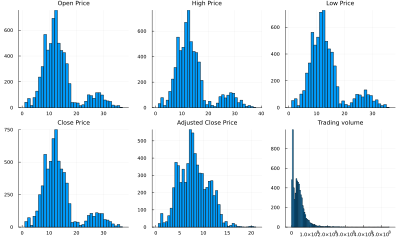

In [107]:
histograms = [StatsPlots.histogram(columns[i], label=labels[i], legend=:false, title=labels[i], titlefont = font(10), dpi=40, size=(600, 400)) for i in 1:length(columns)]
histvol = StatsPlots.histogram(data[:,7], label = "Trading Volume", legend=false, titlefont = font(10), dpi=40, size=(600,400))
final_hist = Plots.plot(histograms...,layout=(2,3), size=(1000,600))
display(final_hist)
 

All variables appear to be somewhat right-skewed at the  visual inspection.

In [108]:
#using Plots
#adjclose = data[:,6];
#adjclose_h = histogram(adjclose, color=:blue, size=(600, 400),framestyle=:box,title = "Adjusted Close Prices", legend=false,ylab = "Count", dpi=25)
adjclose_plot = Plots.plot(data[:,1], data[:,6], line=(1., 1, :solid), framestyle=:box, label="Adjusted Close Price", color="orange", xlab = "Date", size=(900,600),dpi=35)
hline!([stats[5,6]], label = "Mean", color = "black", line=(1., 1, :solid))
hline!([stats[5,6] - stats[5,2], stats[5,2] + stats[5,6]], label = "Standard Deviation", color = "black", line=(1., 1, :dash));

**Looking at the price and trading volume evolution**

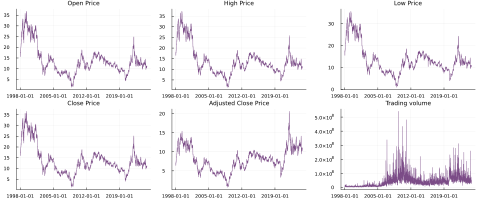

In [14]:
time_series = [Plots.plot(data[:, 1], columns[i], legend=false, title=labels[i], bins = 30, titlefont= font(10),line=(1., 0.7, :solid),palette=:viridis, dpi=40, size=(1200,500)) for i in 1:length(columns)]
comb_plot = Plots.plot(time_series..., layout=(2,3), size=(1200,500))
display(comb_plot)

**We proceed by observing the behaviour of adjusted close prices in different subsets to see if they behave the same over time. We plot the subsets against eachother:**

In [68]:
size(data)

(6748, 7)

In [ ]:
plots_array = []

for t in 1:1124:6744
    subs_plots = Plots.plot(data[:,1][t:t+1124-1], data[:,6][t:t+1124-1], l=(0.5,0.7), title="sub-sample $(t:t+1124-1)", label="", color="orange")
    push!(plots_array, subs_plots) 
end

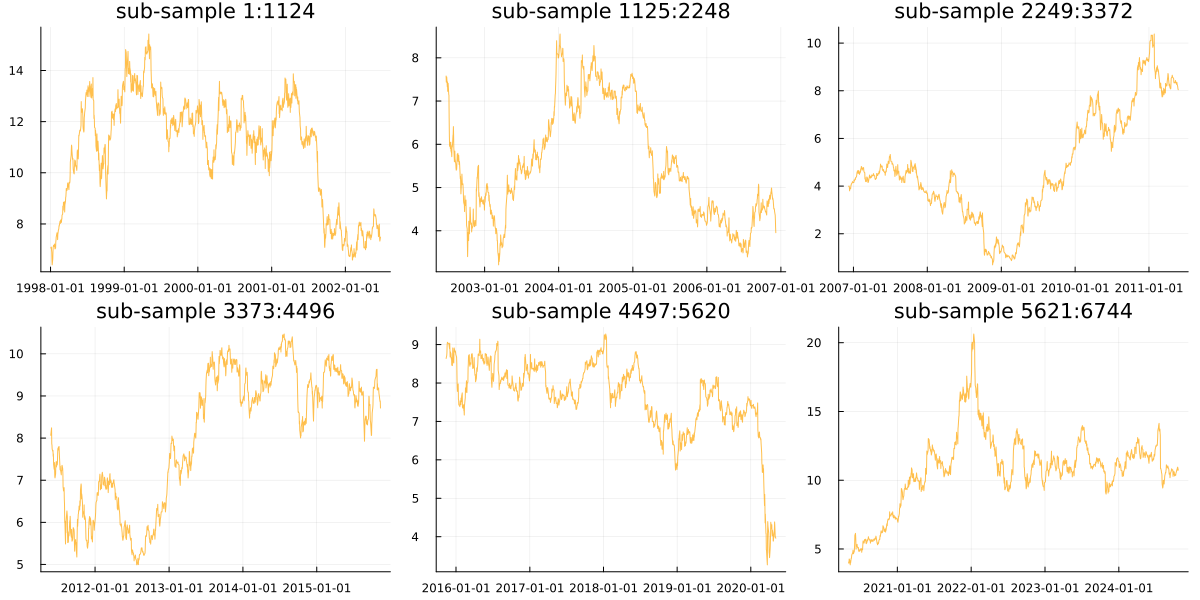

In [86]:
Plots.plot(plots_array...,size=(1200, 600))

In [ ]:
subsample_array = []

for t in 1:11124:6744
    push!(subsample_array, data[:,6][t:t+1124-1])
end

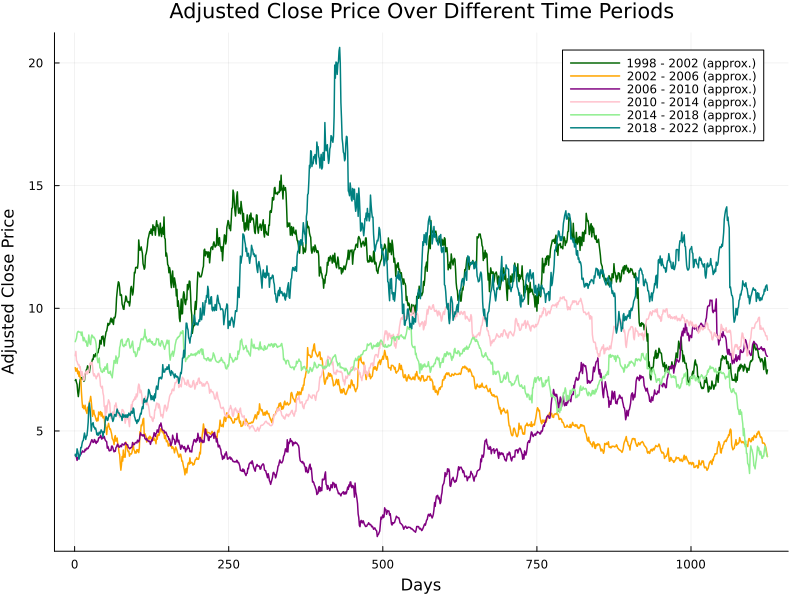

In [ ]:
start_end = ["1998 - 2002", "2002 - 2006", "2006 - 2010", "2010 - 2014", "2014 - 2018", "2018 - 2022"]

combined_plot = Plots.plot(size=(800, 600), xlabel="Days", ylabel="Adjusted Close Price", 
                     title="Adjusted Close Price Over Different Time Periods", legend=:topright)

# Plot each subset with its own time index
for (i, t) in enumerate(1:1124:6744)
    time_index = 1:1124  # Set a relative time index for each subset
    Plots.plot!(combined_plot, time_index, data[:,6][t:t+1124-1], 
          lw=1.5, label="$(start_end[i]) (approx.)", color=colors[i])
end

display(combined_plot)

**Behaviour of prices is very different across the observed period subsets. Stok prices reach their peak during the most recent years, probably caused by the COVID-19 pandemic and the strong market fluctations that ocurred during it. The lowest prices were in the period of 2006-2010, reflecting the global financial crisis of 2008, that has seen one of the worst financial downturns, especially for the automotive sector, due to recession and low investor sentiment.**

In [15]:
function volatility(data) # receives a standard yahoo finance dataframe
    return sqrt.(log.(data[:,3]./data[:,5]) .* log.(data[:,3]./data[:,2]) + log.(data[:,4]./data[:,5]) .* log.(data[:,4]./data[:,2]))
end

volatility (generic function with 1 method)

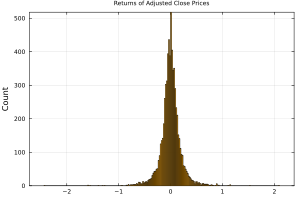

In [16]:
ret = diff(data[:,6]);
h3 = StatsPlots.histogram(ret, framestyle=:box, title = "Returns of Adjusted Close Prices", titlefont=font(8), legend=false, ylab = "Count",color="orange",dpi=50)

Running a check to see the **summary statistics** of the returns shows that the mean is around 0. Minimum and maximum values highlight volatility and show both significant losses and gains through the observed timespan. 3rd quartile reveals that 25% of returns go beyond 0.0899, meaning that although majority of the returns are positive, substantial gains are not that frequent.

In [17]:
println(describe(ret))

Summary Stats:
Length:         6747
Missing Count:  0
Mean:           0.000572
Minimum:        -2.438373
1st Quartile:   -0.085541
Median:         0.000000
3rd Quartile:   0.088703
Maximum:        2.080452
Type:           Float64
nothing


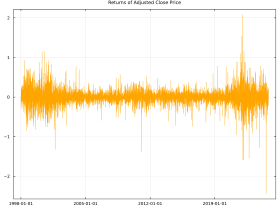

In [22]:
times = data[2:end, 1];
retplot = Plots.plot(times, ret, title="Returns of Adjusted Close Price",titlefont = font(9), legend=false,framestyle=:box, color = "orange", dpi=35, size = (800,600))

**The stronget periods of volatility are noticeable during the financial crisis of 2008-09 and even more so, during the pandemic period of 2019-20.**

### *Calculating loarithmic returns*  
For better statistical modelling, we observe **log returns** and their descriptive statistics. The mean is around 0, maximum increase noted was for 25.8% and decrease 28.7%.

In [23]:
# Calculate log returns
log_ret = diff(log.(data[:,6]));
describe(log_ret)

Summary Stats:
Length:         6747
Missing Count:  0
Mean:           0.000065
Minimum:        -0.287682
1st Quartile:   -0.012133
Median:         0.000000
3rd Quartile:   0.012117
Maximum:        0.258650
Type:           Float64


Mean is around 0, maximum increase and decrease are by 25 and 29 percent, respectively.

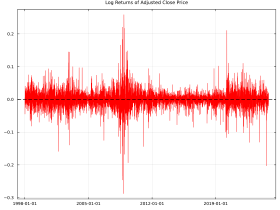

In [161]:
log_retplot = Plots.plot(times, log_ret, title="Log Returns of Adjusted Close Price",titlefont = font(9), legend=false,framestyle=:box, color = "red",dpi=35, size = (800,600))
log_retplot = hline!([0; 0], linestyle=:dash, label = false, lw = 1, color = "Black")


**Plotting the log returns of adjusted close prices show the highest volatility period during the 2008-09 financial crisis, but also post-2019, reflecting periods of market stress and uncertainity.**

### *Realized Volatility*

We calculate the volatility using 2 volatility measures defined in the script.jl file and visually inspect their distributions - RS Volatility that looks at price ratios between high, low, open and close prices and Rolling Volatility that offers  dynamic view on asset's return volatility, with a specified window size that moves through the data.

In [47]:
include("script.jl")

roll_volatility (generic function with 1 method)

In [113]:
roll_volat = roll_volatility(data, 5); # defined in script.jl

In [114]:
rs_volat = rogers_satchell(data); # defined in script.jl

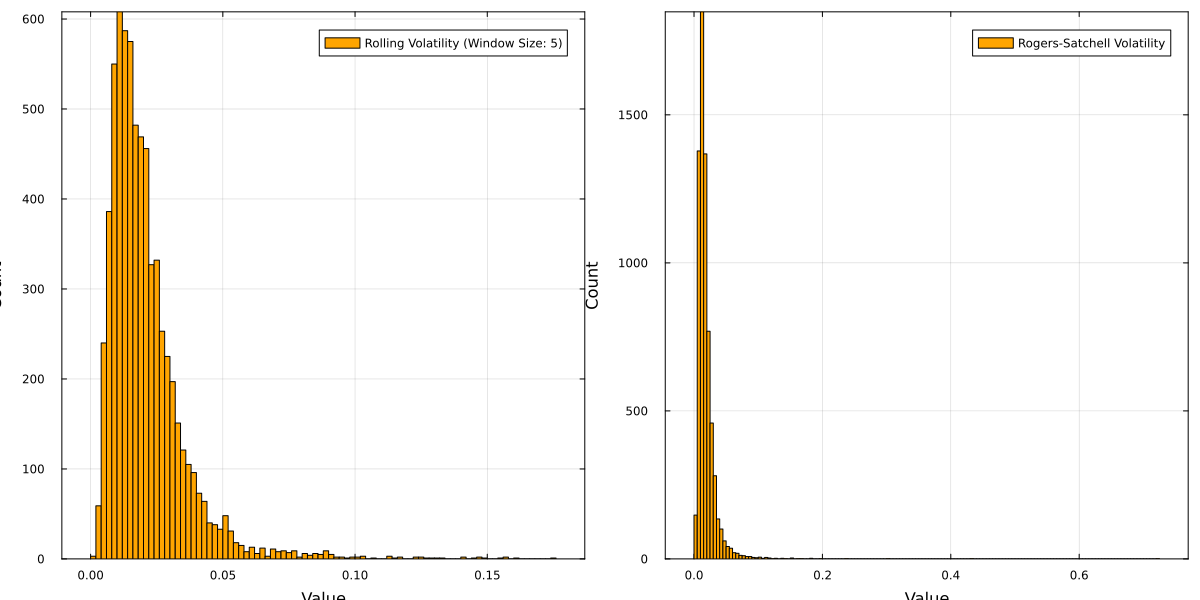

In [142]:
h1 = Plots.histogram(roll_volat, framestyle=:box, label = "Rolling Volatility (Window Size: 5)", ylabel = "Count", xlabel = "Value", color = "orange", bar_border = true, linecolor = "black")
h2 = Plots.histogram(rs_volat, bins = 200, framestyle=:box, label = "Rogers-Satchell Volatility", ylabel = "Count", xlabel = "Value", color = "orange", bar_border = true, linecolor = "black")
Plots.plot(h1, h2, size=(1200,600))

Both estimated volatility models are right-skewed with the presence of outliers.

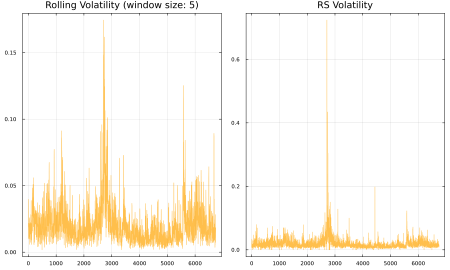

In [145]:
rs_plot = Plots.plot(rs_volat , line=(1., 0.7, :solid),framestyle=:box, legend=false,title="RS Volatility", color = "orange", dpi=45)
roll_plot = Plots.plot(roll_volat , line=(1., 0.7, :solid),framestyle=:box, legend=false,title="Rolling Volatility (window size: 5)", color = "orange", dpi=45)
Plots.plot(roll_plot,rs_plot, size=(1000,600))

**Spikes in volatility are the highest during the Global Financial Crisis of 2008, regardless of the volatility method used. Because the Rogers-Satcher Volatility includes high, low, open and close prices, it may be better at capturing extreme movements and directional trends and hence provide us with more information. Therefore, we proceed our analysis using the Rogers-Satchell Volatilties.**

$$
\text{RV}_{RogerSatchell} = \sqrt{ \left( \ln\frac{H_i}{O_i} \cdot \ln\frac{H_i}{C_i} \right) + \left( \ln\frac{L_i}{O_i} \cdot \ln\frac{L_i}{C_i} \right) }
$$


In [19]:
using ARCHModels

### *ARCH models*
*Using ARCHModels.jl to model asset data and forecast.*

Univariate GARCH (p, q) model:  

$y_t = x_t^T b + \epsilon_t$  
  
    
$\epsilon_t | \psi_{t-1} \sim N \left(0, \sigma_t^2 \right)$  
  
$\sigma_t^2 = \omega + \sum_{i=1}^q \alpha_i \epsilon_{t-1}^2 + \sum_{i=1}^p \beta_i \sigma_{t-i}^2$


We firstly start by examining the **Autocorrelation function (ACF) of squared Rogers-Satchell volatilities** and notice that there seems to be persistent long term dependencies in the data. There seems to be a lingering effect of volatility shocks and a mean reversion behaviour. Relying on the ARCH family in this situation should be beneficial, as it accounts for conditional heteroskedasticity and captures the volatility clustering that we notice in the data.

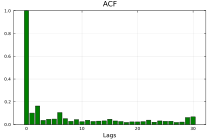

In [162]:
using Statistics
lags=0:30
acf_values = autocor(rs_volat.^2, 0:30, demean=true)
acf_logret = bar(lags, acf_values, title="ACF", legend=false,framestyle=:box, color="green", size=(600,400),dpi=35, xlab="Lags")

**We standardize data and proceed with GARCH model using the rolling procedure. We estimate it for orders 1-4 and plot each estimate against the Rogers-Satchell Volatility to see which one performs the best. We display the loss functions of each using Mean Squared Errors (MSE).**

In [274]:
# Creating Data Frame of RS Volatility for HAR model application
rs_dat = DataFrame([(rs_volat[23:end]) HAR_regressors(rs_volat)], [:rv, :rv_d, :rv_w, :rv_m])
y_rs = rs_dat[:,1]'
x_rs = Matrix(rs_dat[:,2:4])'

# Standardizing data
fit_x_rs = StatsBase.fit(ZScoreTransform, x_rs; dims=2, center=true, scale=true)
fit_y_rs = StatsBase.fit(ZScoreTransform, y_rs; dims=2, center=true, scale=true)
x_rs_std = StatsBase.transform(fit_x_rs, x_rs)
y_rs_std = StatsBase.transform(fit_y_rs, Matrix(y_rs))

# Creating Data Frame of standardized RS Volatility for HAR model application
rs_std_data = DataFrame([y_rs_std' x_rs_std'], [:rv, :rv_d, :rv_w, :rv_m]);

In [231]:
time_col = data[:,1];

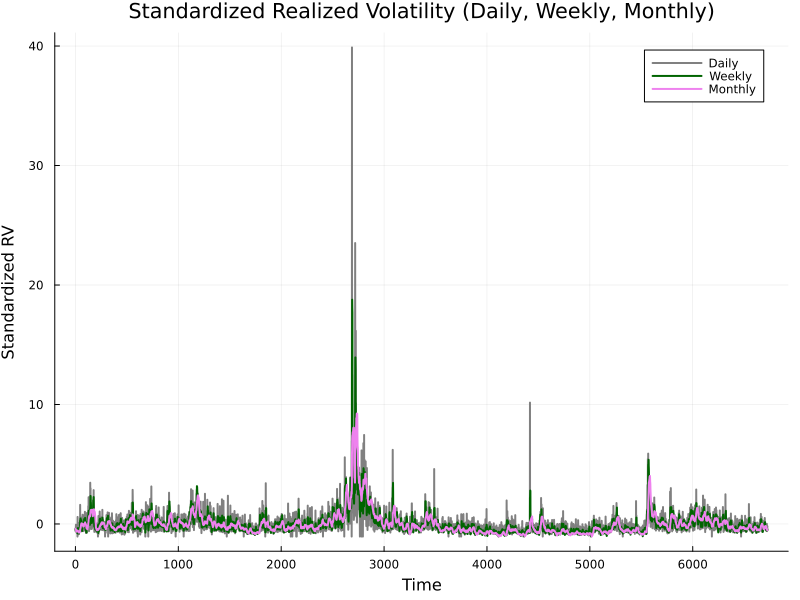

In [ ]:
rv_d = rs_std_data.rv_d
rv_w = rs_std_data.rv_w
rv_m = rs_std_data.rv_m
Plots.plot(
    1:length(rv_d), rv_d, label="Daily", xlabel="Time", ylabel="Standardized RV", 
    title="Standardized Realized Volatility (Daily, Weekly, Monthly)", 
    legend=:topright, linewidth=2, color=:grey,
    size=(800, 600)  
)
Plots.plot!(
    1:length(rv_w), rv_w, label="Weekly", linewidth=2, color=:darkgreen
)
Plots.plot!(
    1:length(rv_m), rv_m, label="Monthly", linewidth=2, color="violet"
)

The weekly and monthly volatilities are smoother compared to the daily one and less prone to extreme fluctuations, as a lot of the noise is averaged out. Volatility clusters are apparent regardless. 

In [ ]:
T = length(log_ret);
windowsize = 5;
garch1 = Vector{Float64}()
garch2 = Vector{Float64}()
garch3 = Vector{Float64}()
garch4 = Vector{Float64}()
for t = windowsize+1:T
    model1 = fit(GARCH{1, 1}, log_ret[t-windowsize:t], meanspec=Intercept)
    pred_garch_std1 = StatsBase.transform(fit_y_rs, Matrix(hcat(predict.(model1, :volatility, 1))))
    push!(garch1, pred_garch_std1[1,1])

    model2 = fit(GARCH{2, 2}, log_ret[t-windowsize:t], meanspec=Intercept)
    pred_garch_std2 = StatsBase.transform(fit_y_rs, Matrix(hcat(predict.(model2, :volatility, 1))))
    push!(garch2, pred_garch_std2[1,1])
   
    model3 = fit(GARCH{3, 3}, log_ret[t-windowsize:t], meanspec=Intercept)
    pred_garch_std3 = StatsBase.transform(fit_y_rs, Matrix(hcat(predict.(model3, :volatility, 1))))
    push!(garch3, pred_garch_std3[1,1])

    model4 = fit(GARCH{4, 4}, log_ret[t-windowsize:t], meanspec=Intercept)
    pred_garch_std4 = StatsBase.transform(fit_y_rs, Matrix(hcat(predict.(model4, :volatility, 1))))
    push!(garch4, pred_garch_std4[1,1])
end;

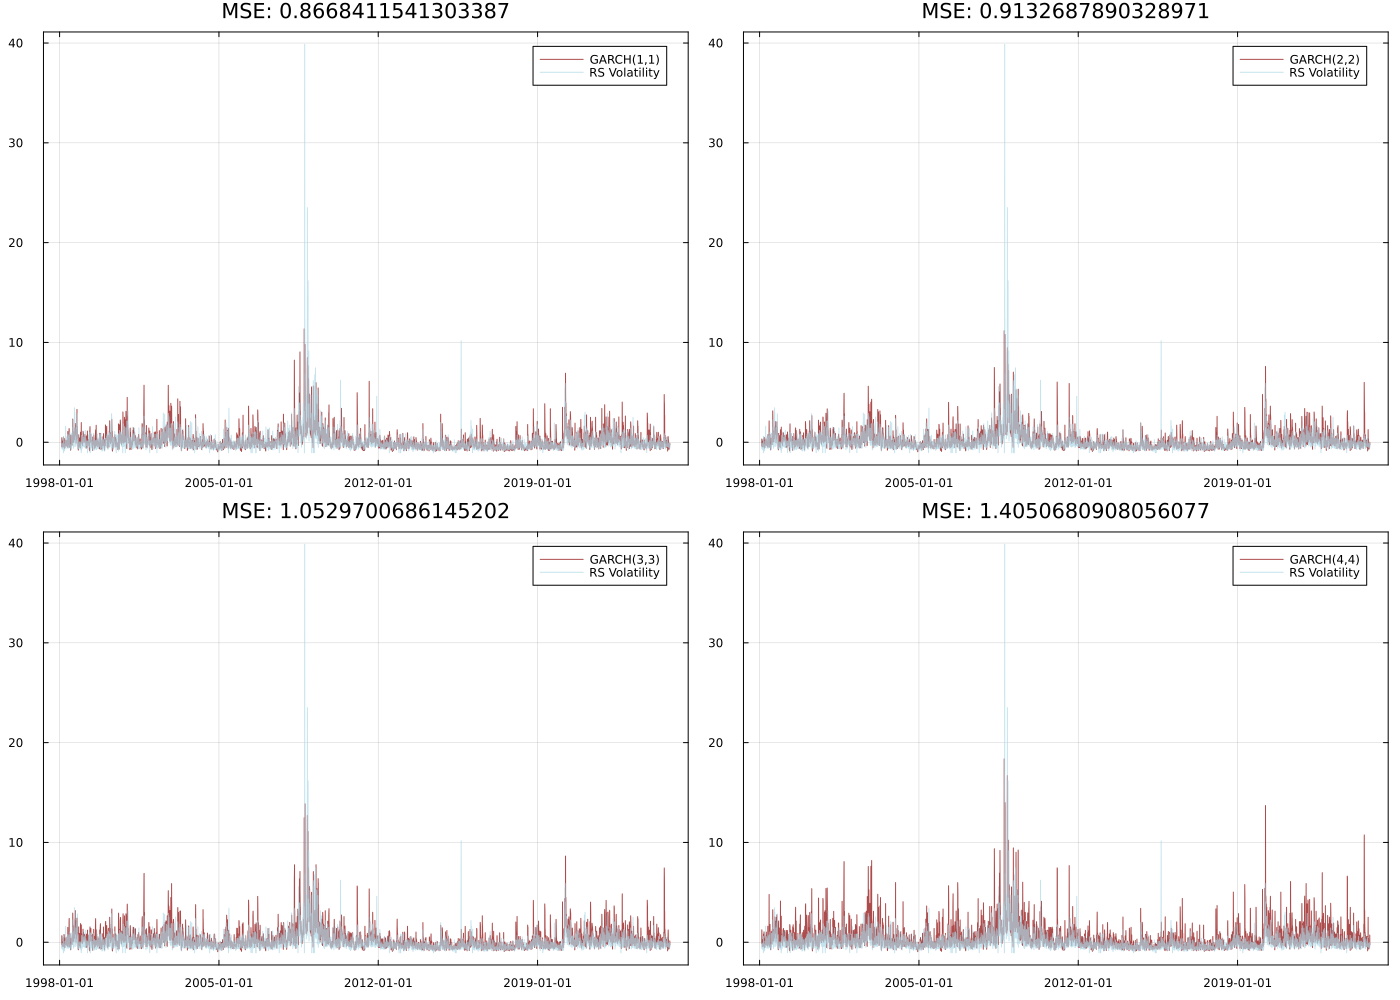

In [263]:
time_col[windowsize+1+1+16:T+1] #skipping first 22 data points in standardized data frame of Rodgers-Volatility
garch1[17:end,:]
rs_std_data[:,1]

p1 = Plots.plot(time_col[windowsize+1+1+16:T+1], garch1[17:end,:], label = "GARCH(1,1)", line=(1., 0.7, :solid), color="darkred", title = "MSE: $(Flux.Losses.mse(garch1[17:end,:],rs_std_data[:,1]))")
Plots.plot!(time_col[windowsize+1+1+16:T+1], rs_std_data[:,1], label = "RS Volatility", line=(1., 0.7, :solid), framestyle=:box, color="lightblue")
p2 = Plots.plot(time_col[windowsize+1+1+16:T+1], garch2[17:end,:], label = "GARCH(2,2)", line=(1., 0.7, :solid),color="darkred", title = "MSE: $(Flux.Losses.mse(garch2[17:end,:],rs_std_data[:,1]))")
Plots.plot!(time_col[windowsize+1+1+16:T+1], rs_std_data[:,1], label = "RS Volatility", line=(1., 0.7, :solid), framestyle=:box, color="lightblue")
p3 = Plots.plot(time_col[windowsize+1+1+16:T+1], garch3[17:end,:], label = "GARCH(3,3)", line=(1., 0.7, :solid), color="darkred",title = "MSE: $(Flux.Losses.mse(garch3[17:end,:],rs_std_data[:,1]))")
Plots.plot!(time_col[windowsize+1+1+16:T+1], rs_std_data[:,1], label = "RS Volatility", line=(1., 0.7, :solid), framestyle=:box, color="lightblue")
p4 = Plots.plot(time_col[windowsize+1+1+16:T+1], garch4[17:end,:], label = "GARCH(4,4)", line=(1., 0.7, :solid), color="darkred",title = "MSE: $(Flux.Losses.mse(garch4[17:end,:],rs_std_data[:,1]))")
Plots.plot!(time_col[windowsize+1+1+16:T+1], rs_std_data[:,1], label = "RS Volatility", line=(1., 0.7, :solid), framestyle=:box, color="lightblue")
Plots.plot(p1,p2,p3,p4, size=(1400,1000))

**The one-step rolling GARCH (1,1) model does the best job at minimizing the loss function and even visually we can see the model behaves very similarily to the estimated Roger-Satchell volatilities we've used as our target. All of the estimated models, except for GARCH(1,1), seem to overestimate the magnitude of volatility.** 

To see if the GARCH(1,1) model does a good job at getting rid of autocorrelation, we once again plot the ACF, but this time using the squared residuals we got from the estiamted Garch model.

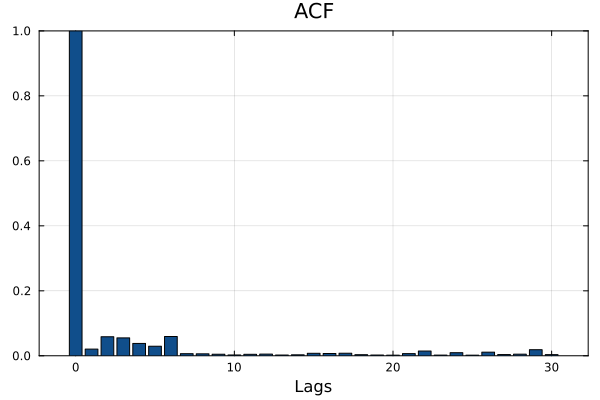

In [271]:
lag_max = 30
lags = 0:lag_max
residualz = garch1[17:end,:]-rs_std_data[:,1]
acf_values = autocor(residualz.^2, 0:30, demean=true)
acfgarch = bar(lags, acf_values, title="ACF", legend=false, framestyle=:box, color = "dodgerblue4", barwidth = 0.02, xlabel = "Lags") 

**The estimated one-period-ahead GARCH (1,1) model with rolling procedure indeed does a good job of getting rid of most long-term dependencies in our dataset.**